### Importing the pre-requisite library

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path

### Load the movie lens dataset i.e loading the u.data having rating

In [2]:
raw_file_path = '/Users/vishalsaxena/Documents/DS_Workspace/ds_bootcamp/data/raw/ml-100k/'

In [3]:
columns_names = 'user id | item id | rating | timestamp'
ratings_df = pd.read_csv(os.path.join(raw_file_path, 'u.data'), sep='\t', names=columns_names.split(' | '))
ratings_df.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Identifying Chardet of u.item file

In [4]:
import chardet
with open(os.path.join(raw_file_path, 'u.item'), 'rb') as file:
    charset = chardet.detect(file.read(80000))
charset

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

### Loading the u.item dataset have movies dataset

In [5]:
column_names = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children\'s | Comedy | Crime | Documentary | Drama | Fantasy |  Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |  Thriller | War | Western |'
movies_df = pd.read_csv(os.path.join(raw_file_path, 'u.item'), 
                     sep='|', names=column_names.split(' | '), 
                     encoding='ISO-8859-1')
movies_df.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western |
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Loading the u.user dataset have user dataset

In [6]:
column_names = 'user id | age | gender | occupation | zip code'
users_df = pd.read_csv(os.path.join(raw_file_path, 'u.user'), sep='|', names=column_names.split(' | '))
users_df.head()
users_df['user id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 943 entries, 0 to 942
Series name: user id
Non-Null Count  Dtype
--------------  -----
943 non-null    int64
dtypes: int64(1)
memory usage: 7.5 KB


### Univariate plots of rating with count

In [8]:
x = ratings_df.rating.value_counts()
x.values

array([34174, 27145, 21201, 11370,  6110])

In [9]:
x.index

Index([4, 3, 5, 2, 1], dtype='int64', name='rating')

In [10]:
type(x.index)

pandas.core.indexes.base.Index

In [11]:
x.index

Index([4, 3, 5, 2, 1], dtype='int64', name='rating')

<Axes: xlabel='rating', ylabel='count'>

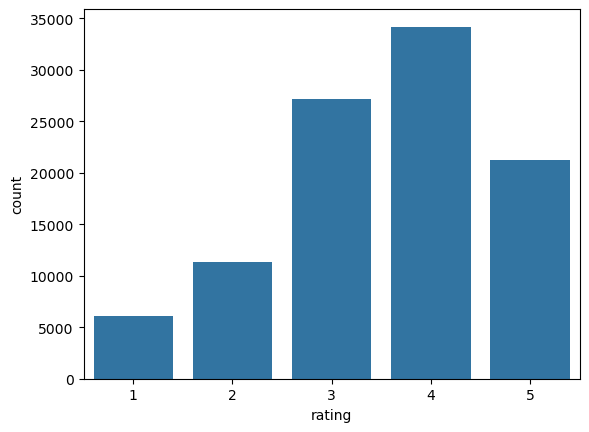

In [12]:
sns.barplot(data=x)

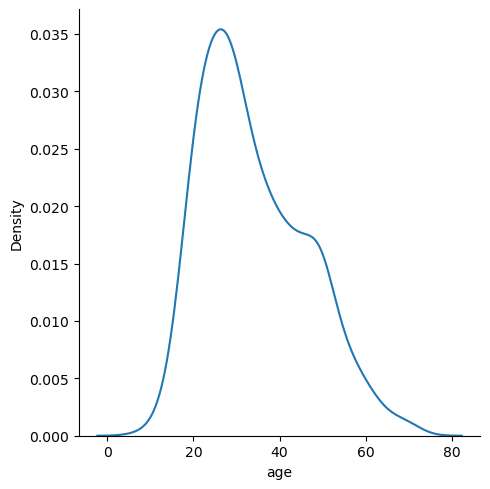

In [13]:
sns.displot(users_df['age'], kind='kde')

In [ ]:
sns.distplot(users_df['age'])

In [ ]:
sns.kdeplot(users_df['age'], fill=True)

In [39]:
movies_df['release year'] = movies_df['release date'].str.split('-', expand=True)[2]
movies_df['release year'].isna().sum()

np.int64(1)

In [40]:
x = movies_df['release year'].value_counts()

/var/folders/jx/cc9brgl143z9wt4bc65wylz40000gn/T/ipykernel_71022/994747922.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies_df['release year'].value_counts())


<Axes: xlabel='count', ylabel='Density'>

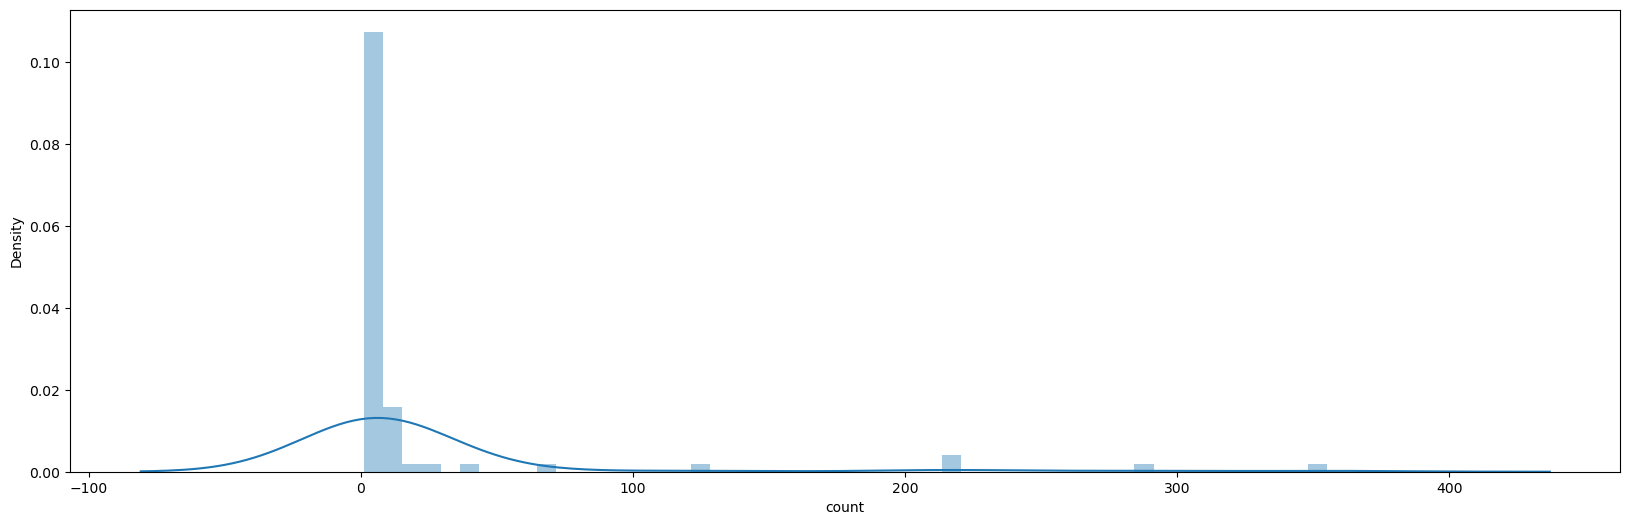

In [43]:
plt.figure(figsize=(20,6)) 
sns.distplot(movies_df['release year'].value_counts())

<Axes: ylabel='release year'>

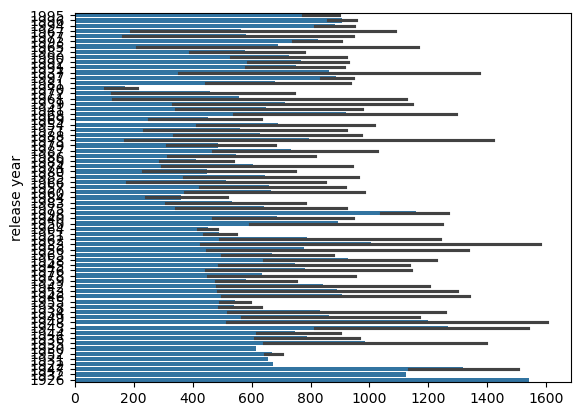

In [44]:
sns.barplot(data = movies_df['release year'])

In [57]:
movies_df['release year'].value_counts()

release year
1996    355
1997    286
1995    219
1994    214
1993    126
       ... 
1930      1
1931      1
1922      1
1932      1
1926      1
Name: count, Length: 71, dtype: int64

<Axes: xlabel='release year', ylabel='count'>

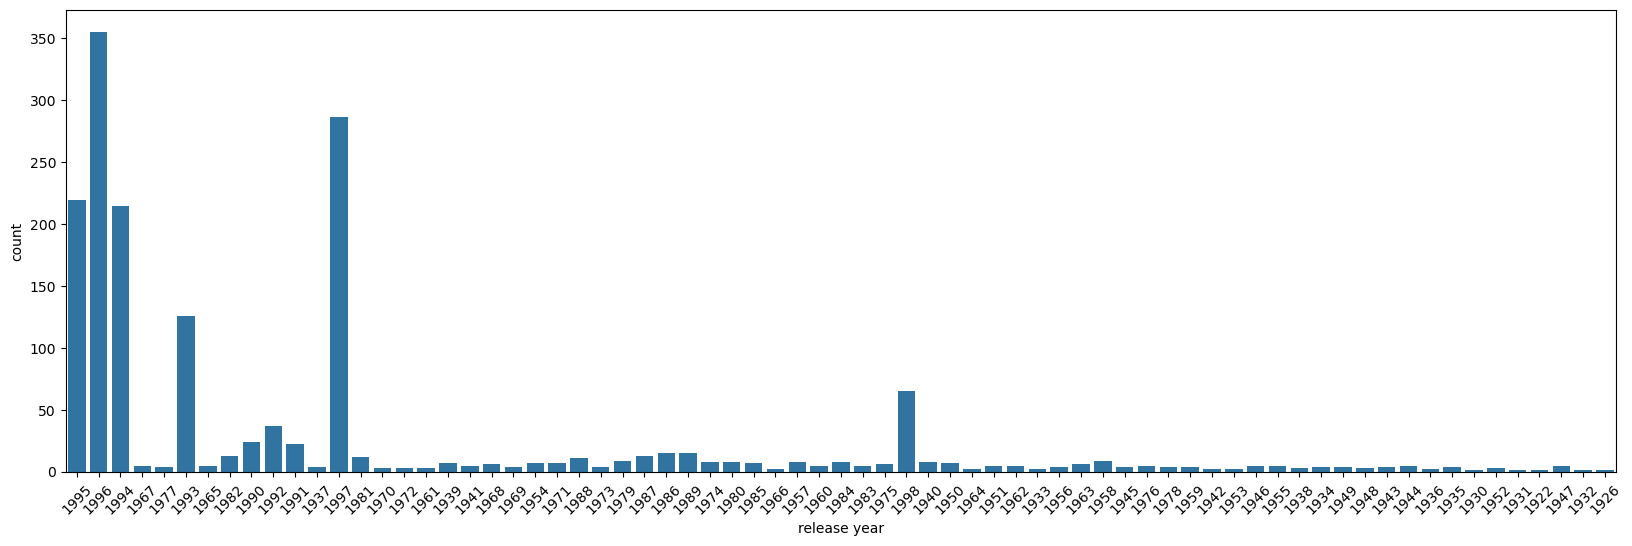

In [61]:
plt.figure(figsize=(20,6)) 
plt.xticks(rotation=45)
sns.countplot(data = movies_df, x='release year')